In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# etc.

# Load the dataset from the uploaded file
bh_data = pd.read_csv('D:/CS Classes at GT/CS 7641 - ML/ASSIGNMENT-1/boston.csv')
print(bh_data.head())
print(bh_data.info())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

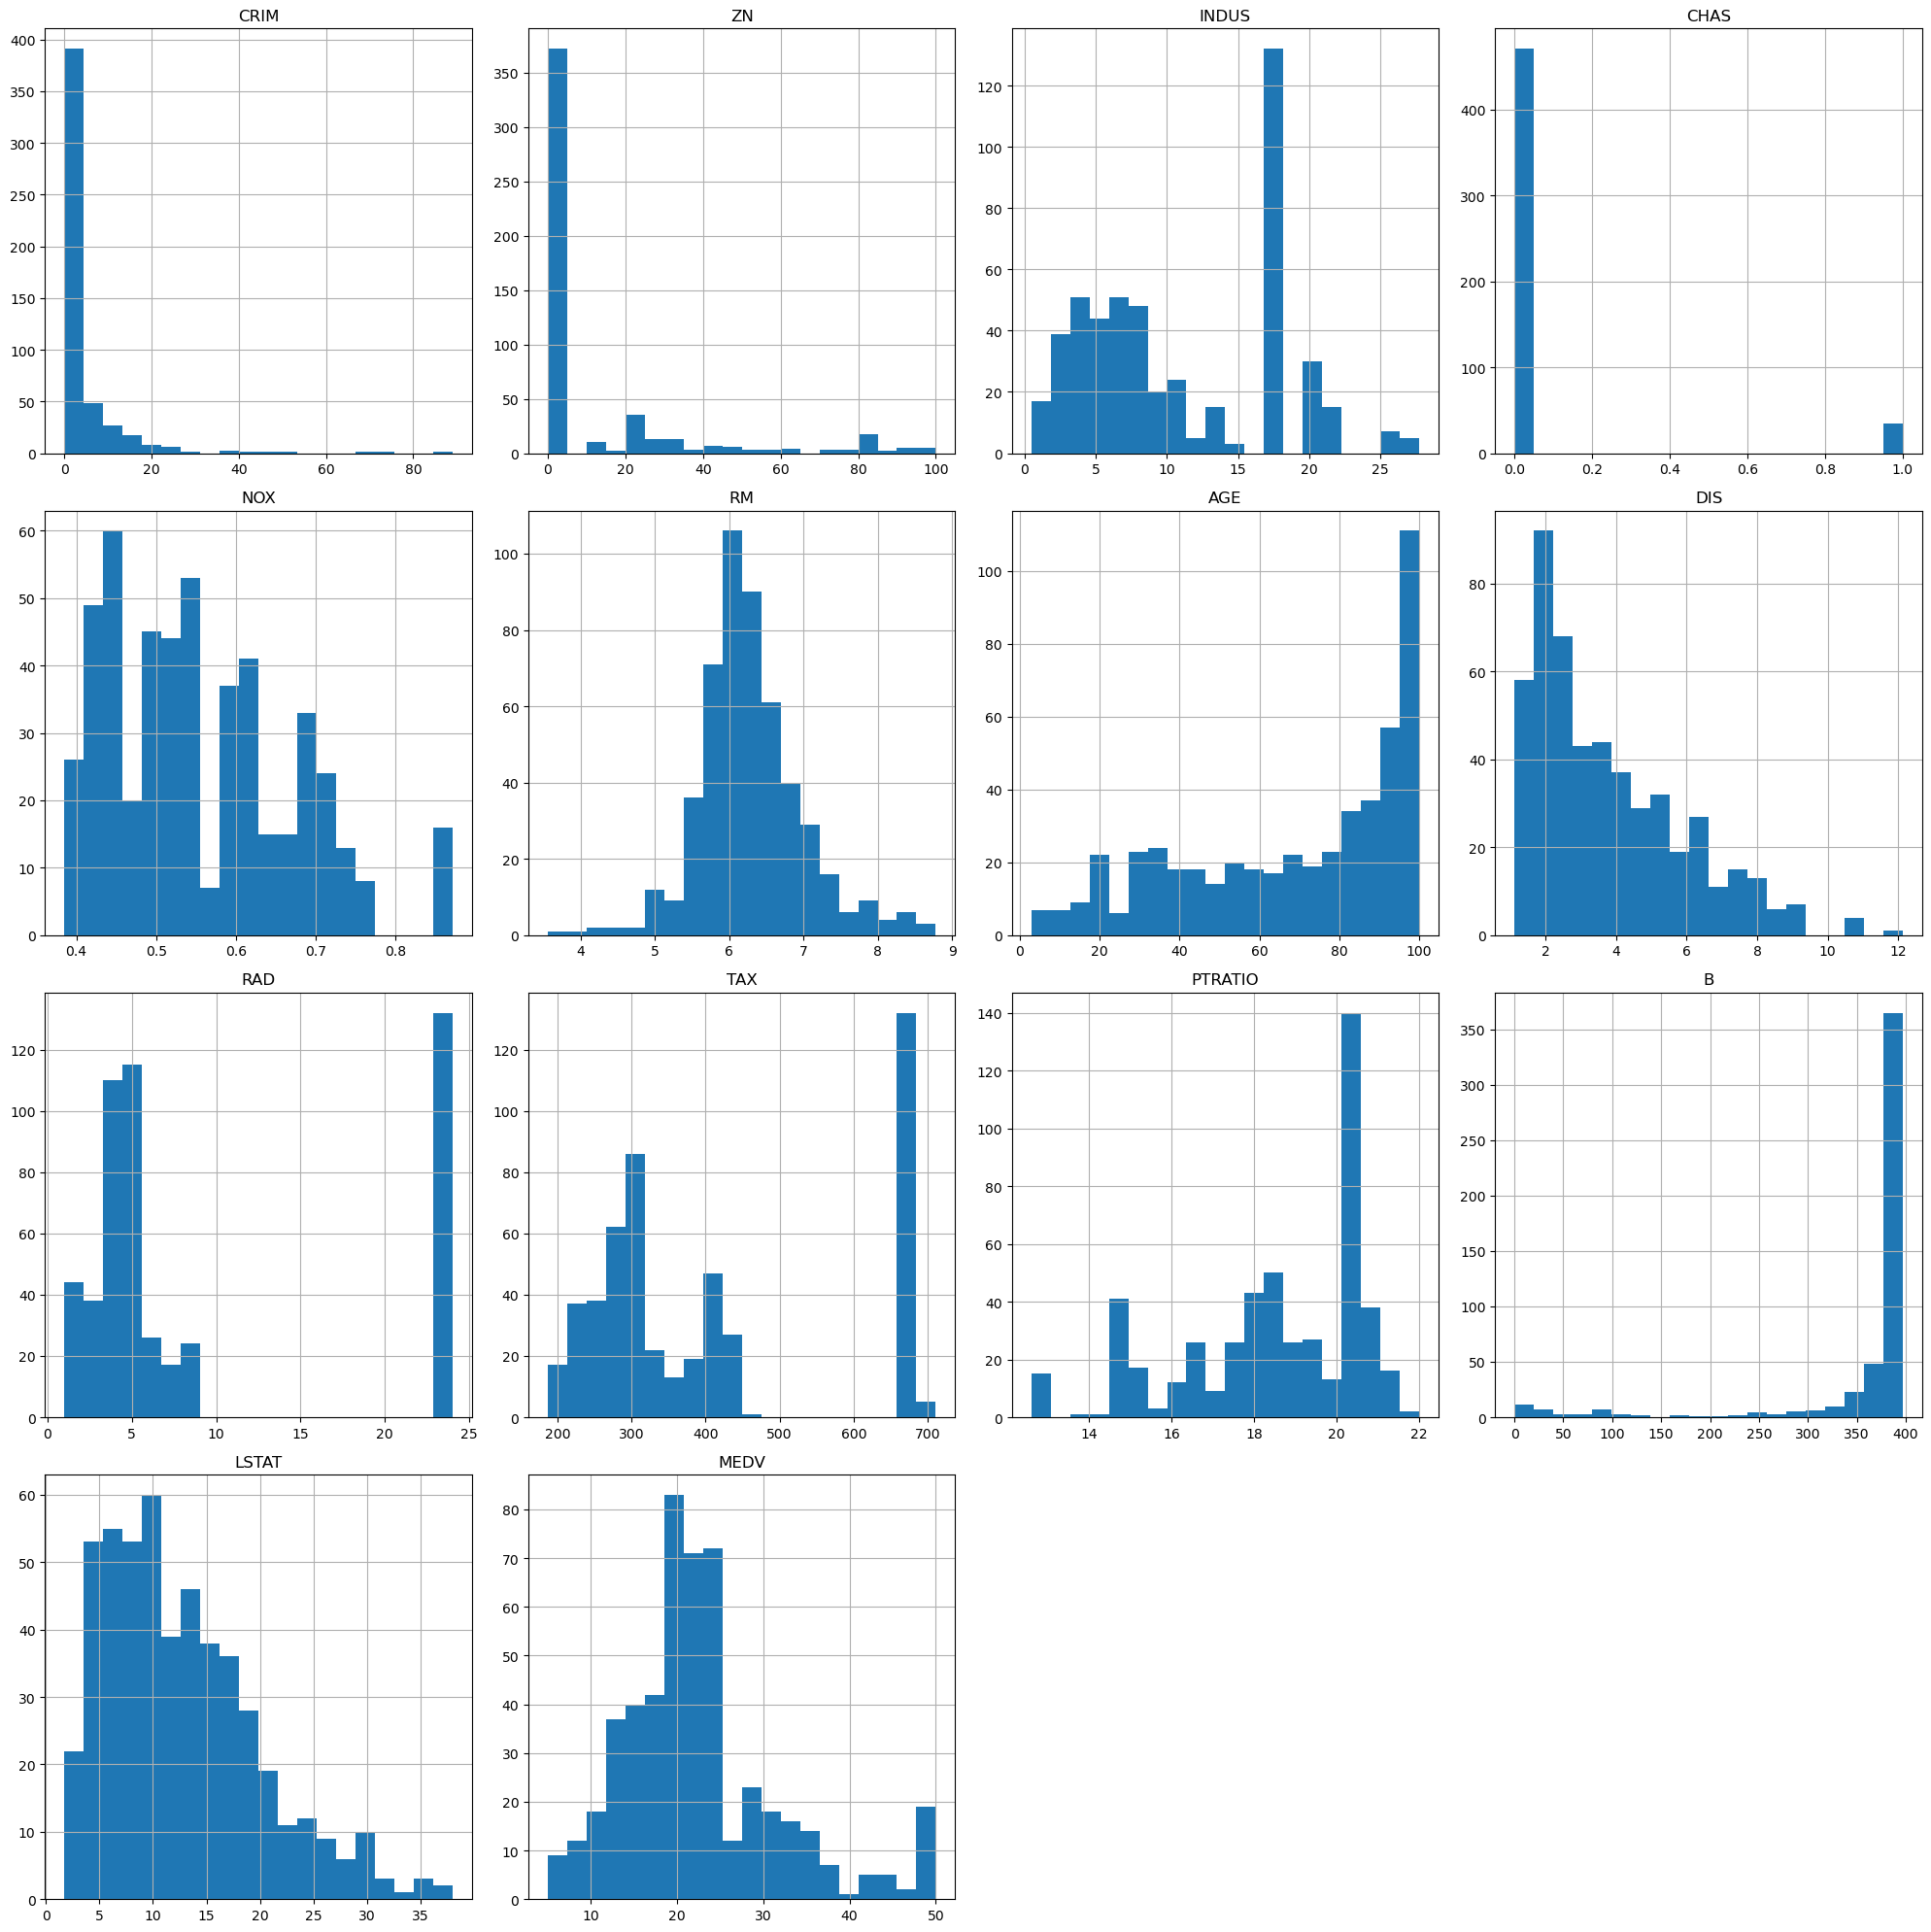

In [4]:
# Visualize the distribution of each feature in the dataset
bh_data.hist(figsize=(20, 20), bins=20)
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()


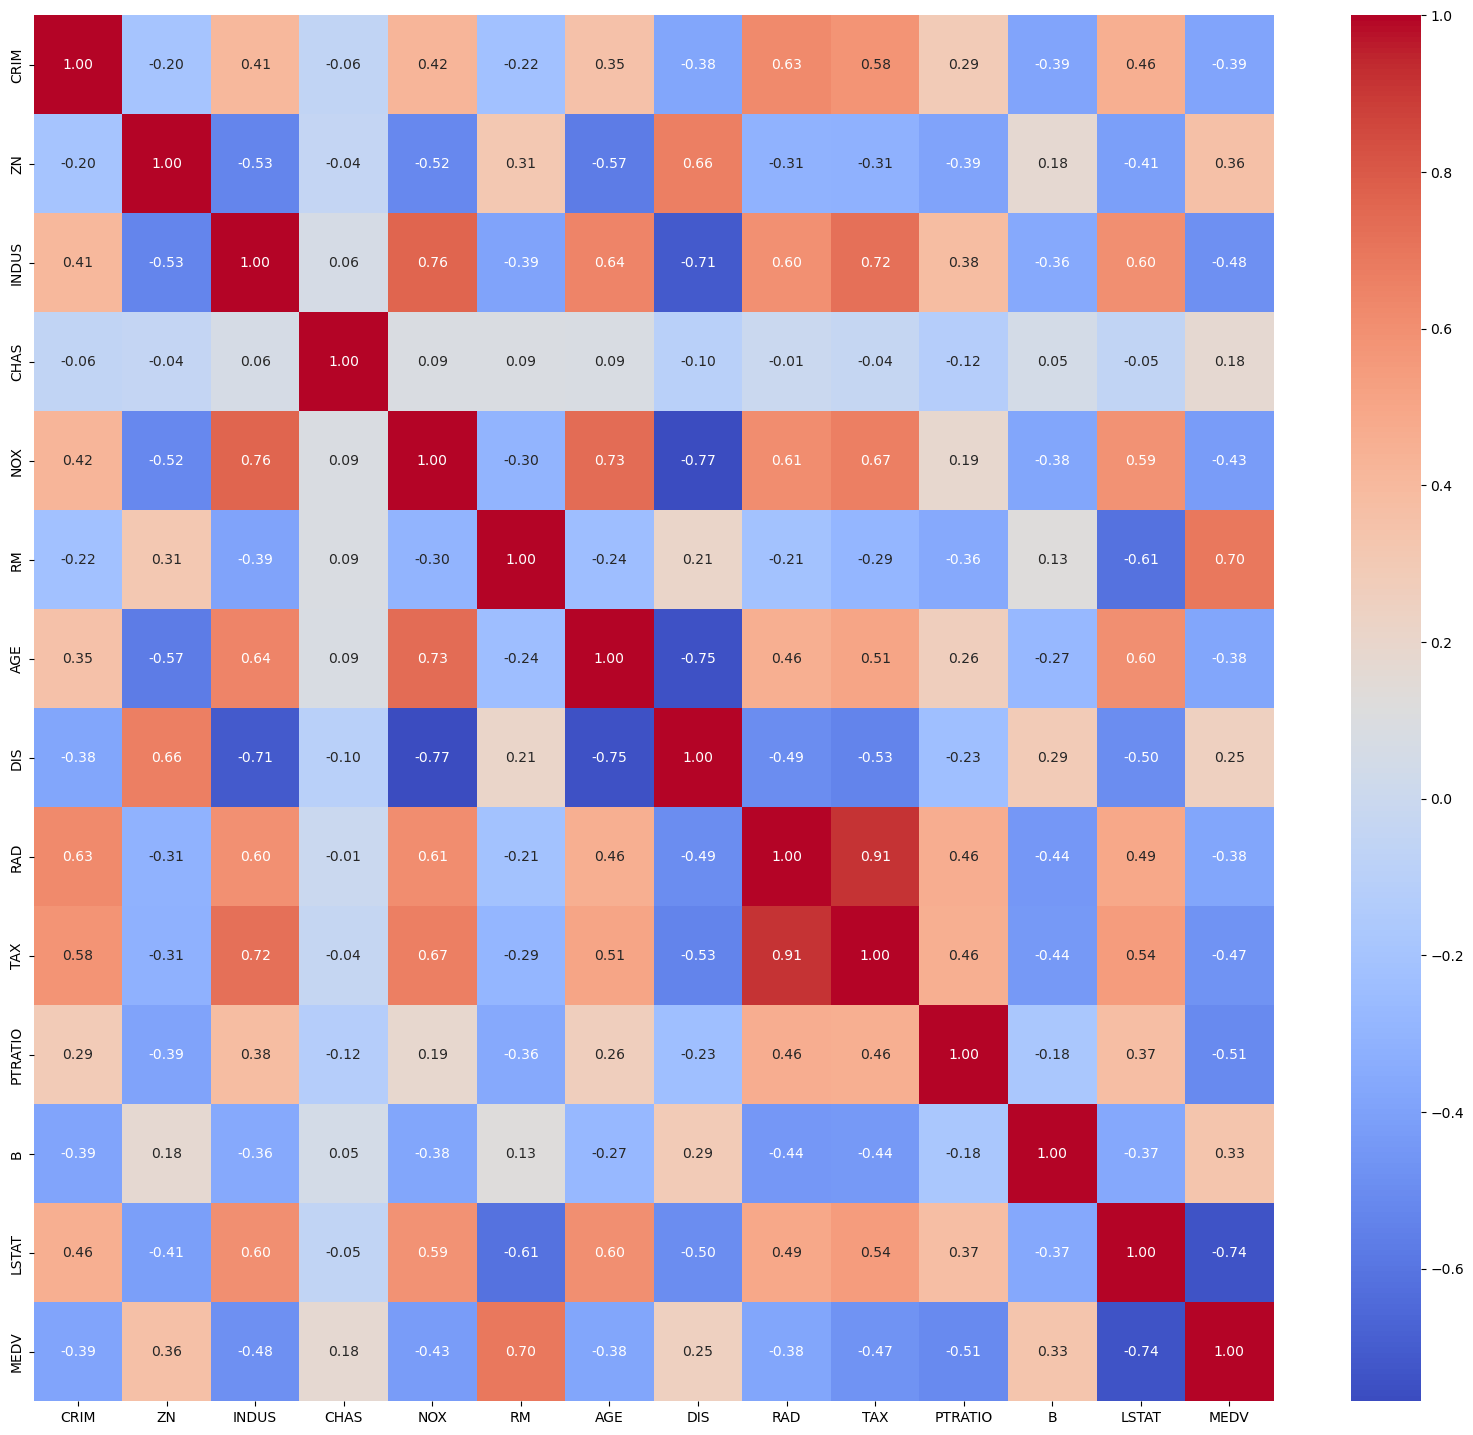

In [5]:
plt.figure(figsize=(20, 18))
# Generate a heatmap for the correlation matrix of the Boston Housing dataset
sns.heatmap(bh_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

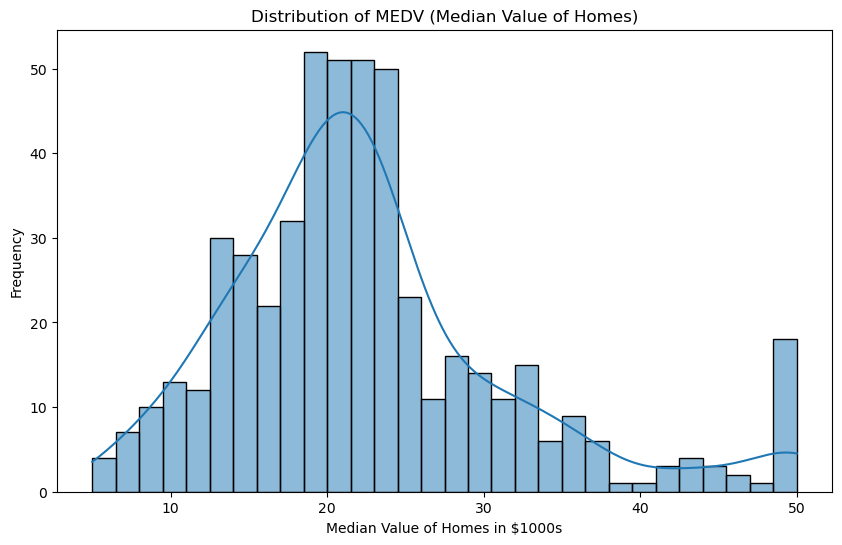

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(bh_data['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('Median Value of Homes in $1000s')
plt.ylabel('Frequency')
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (independent variables) and the target (dependent variable)
X = bh_data.drop('MEDV', axis=1)
y = bh_data['MEDV']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
import math

# Determine the range for k
k_range = range(2, int(math.sqrt(len(X_train))) + 1)

# Initialize a list to store the kNN classifiers
knn_classifiers = {k: KNeighborsClassifier(n_neighbors=k) for k in k_range}


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Initialize a list to store the kNN regressors
knn_regressors = {k: KNeighborsRegressor(n_neighbors=k) for k in k_range}

# Dictionary to store the mean cross-validation scores for each k
cv_scores = {}

# Perform 10-fold cross-validation and store the mean score for each k
for k, model in knn_regressors.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')  # Using neg_mean_squared_error for regression
    cv_scores[k] = np.mean(scores)

# Find the key with the highest value (optimal k)
optimal_k = max(cv_scores, key=cv_scores.get)
print(f"Optimal k: {optimal_k} with score: {cv_scores[optimal_k]}")


Optimal k: 3 with score: -19.697253262786592


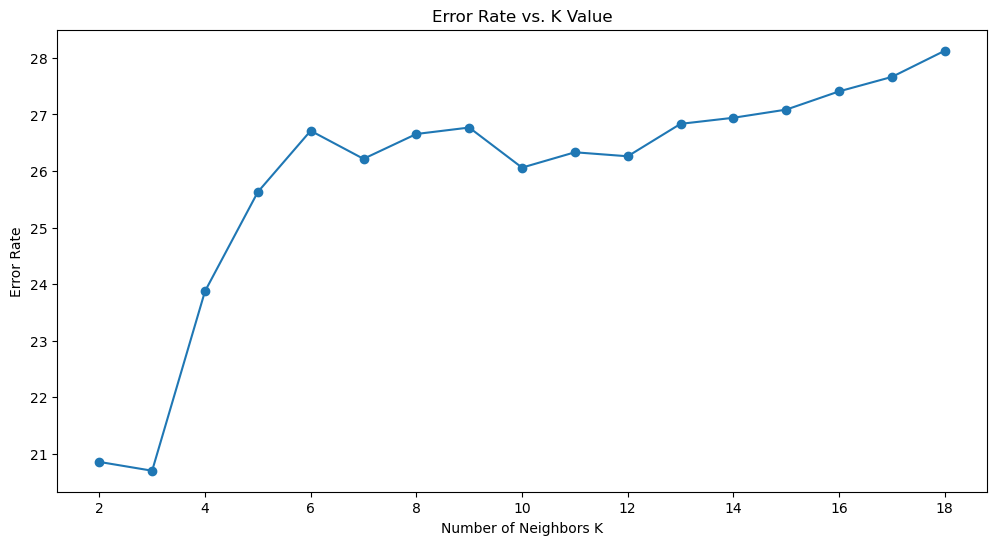

In [7]:
# Calculate error rate (1 - accuracy) for each k
error_rates = {k: 1 - score for k, score in cv_scores.items()}

# Plotting error rates
plt.figure(figsize=(12, 6))
plt.plot(list(error_rates.keys()), list(error_rates.values()), marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')
plt.show()


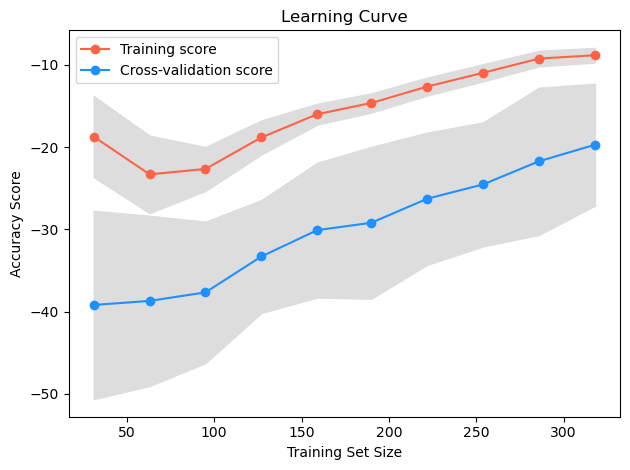

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have already found the optimal_k for regression
optimal_k = 3  # Replace with the value you found to be optimal for regression

train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsRegressor(n_neighbors=optimal_k), 
    X_train, 
    y_train, 
    cv=10, 
    scoring='neg_mean_squared_error',  # Change to a regression scoring metric
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, 'o-', color="#FF6347", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="#1E90FF", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


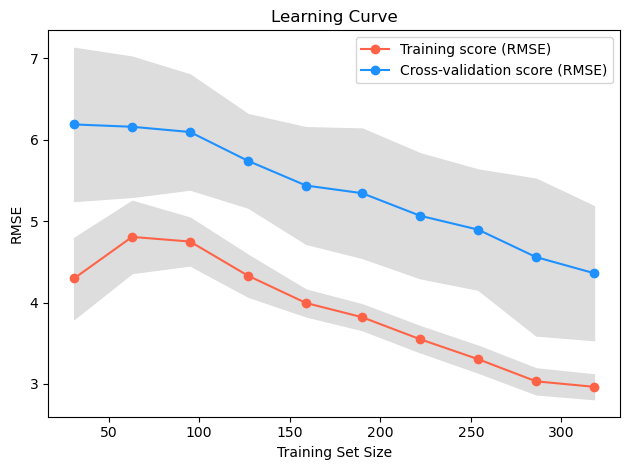

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate RMSE from the neg_MSE scores
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

# Calculate mean and standard deviation for training set RMSE
train_mean = np.mean(train_rmse, axis=1)
train_std = np.std(train_rmse, axis=1)

# Calculate mean and standard deviation for test set RMSE
test_mean = np.mean(test_rmse, axis=1)
test_std = np.std(test_rmse, axis=1)

# Plot learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, 'o-', color="#FF6347", label="Training score (RMSE)")
plt.plot(train_sizes, test_mean, 'o-', color="#1E90FF", label="Cross-validation score (RMSE)")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("RMSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

# Train the regressor with the optimal k for regression
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_optimal.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 17.534729532163745
RMSE: 4.187449048306587
R-squared: 0.7646758680668019


In [14]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Load and prepare your dataset
# X_train, X_test, y_train, y_test = ...

# Initialize lists for line plot data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for bar chart data (metrics at 100% training size)
training_time_bar = None
testing_time_bar = None
r2_score_bar = None
mae_bar = None
mse_bar = None

# Loop through training sizes for line plots
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    knn = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
    
        # Measure training time with higher resolution and repeat training
    total_training_time = 0
    for _ in range(10):  # Repeat training 10 times
        start_time = time.perf_counter()
        knn.fit(X_train_part, y_train_part)
        total_training_time += time.perf_counter() - start_time
    training_time = total_training_time / 10  # Average training time

    # Measure testing time with multiple iterations for higher accuracy
    total_testing_time = 0
    for _ in range(100):  # Repeat predictions 100 times
        start_time = time.perf_counter()
        knn.predict(X_test)
        total_testing_time += time.perf_counter() - start_time
    testing_time = total_testing_time / 100  # Average testing time


    # Store results
    training_sizes_line.append(size * 100)
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Metrics for bar chart at 100% training size
knn.fit(X_train, y_train)
y_pred_full_test = knn.predict(X_test)

r2_score_bar = r2_score(y_test, y_pred_full_test)
mae_bar = mean_absolute_error(y_test, y_pred_full_test)
mse_bar = mean_squared_error(y_test, y_pred_full_test)

# Create DataFrames
line_plot_df = pd.DataFrame({
    'Training Size (%)': training_sizes_line,
    'Training Time (s)': training_times_line,
    'Testing Time (s)': testing_times_line
})

bar_chart_df = pd.DataFrame({
    'Metric': ['R2-Score', 'MAE', 'MSE'],
    'Value': [r2_score_bar, mae_bar, mse_bar]
})

# Export to Excel
with pd.ExcelWriter(r'D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT-1\Boston Housing- Figures\boston_housing_knn_performance_analysis.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)
